_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              11264     
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 930,305
Trainable params: 930,305
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 5049 samples
Epoch 1/100
54000/54000 [==============================] - 121s 2ms/step - loss: 0

54000/54000 [==============================] - 109s 2ms/step - loss: 1.3650e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3229e-04 - val_mean_absolute_error: 0.0099
Epoch 42/100
54000/54000 [==============================] - 108s 2ms/step - loss: 1.3640e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3231e-04 - val_mean_absolute_error: 0.0099
Epoch 43/100
54000/54000 [==============================] - 108s 2ms/step - loss: 1.3622e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3216e-04 - val_mean_absolute_error: 0.0099
Epoch 44/100
54000/54000 [==============================] - 108s 2ms/step - loss: 1.3634e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3381e-04 - val_mean_absolute_error: 0.0100
Epoch 45/100
54000/54000 [==============================] - 1863s 34ms/step - loss: 1.3594e-04 - mean_absolute_error: 0.0101 - val_loss: 1.5812e-04 - val_mean_absolute_error: 0.0106
Epoch 46/100
54000/54000 [==============================] - 106s 2ms/step - loss: 1.3556e-04 - mean_absolute_er

54000/54000 [==============================] - 105s 2ms/step - loss: 1.3561e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3222e-04 - val_mean_absolute_error: 0.0099
Epoch 90/100
54000/54000 [==============================] - 105s 2ms/step - loss: 1.3550e-04 - mean_absolute_error: 0.0100 - val_loss: 1.3487e-04 - val_mean_absolute_error: 0.0100
Epoch 92/100
54000/54000 [==============================] - 105s 2ms/step - loss: 1.3530e-04 - mean_absolute_error: 0.0100 - val_loss: 1.3387e-04 - val_mean_absolute_error: 0.0100
Epoch 93/100
54000/54000 [==============================] - 105s 2ms/step - loss: 1.3551e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3227e-04 - val_mean_absolute_error: 0.0099
Epoch 94/100
54000/54000 [==============================] - 106s 2ms/step - loss: 1.3551e-04 - mean_absolute_error: 0.0101 - val_loss: 1.3337e-04 - val_mean_absolute_error: 0.0099
Epoch 95/100
54000/54000 [==============================] - 105s 2ms/step - loss: 1.3543e-04 - mean_absolute_erro

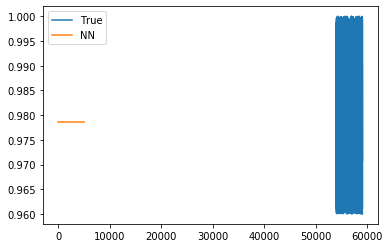

-0.011308662080174559
0.009947566201118413


In [48]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2019/6/27 9:27
# @Site    : 
# @File    : f1.py
# @Software: PyCharm

import pandas as pd
import numpy as np
from keras.layers import Dense,Dropout,Activation,Input
from keras.models import Sequential,Model
from numpy import *
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error

# x = pd.read_csv('params.csv')
# # print(x)
# x = x.values
# trainX = x[0:54000]
# trainX = pd.DataFrame(trainX)
# print(len(trainX),trainX)
# testX = x[54000::]
# testX = pd.DataFrame(testX)
# print(type(testX), len(testX),testX)

# y = pd.read_csv('label.csv', usecols=['AntiSpot'])
# print(type(y), y)
# trainY = y[0:54000]
# testY = y[54000::]
# print(trainY, testY)

#神经网络模型构建
def make_model(InputSize):
    model=Sequential()
    model.add(Dense(units=128,activation='relu',input_shape=(InputSize,)))
#     model.add(Dropout(0.05))
    model.add(Dense(units=512,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=512,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=256,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=1,activation=None))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.mae])
    print(model.summary())
    return model

if __name__ == '__main__':

    #划分训练集和测试集的输入输出 
#     df_train=pd.read_csv('train_data.csv')
#     df_test=pd.read_csv('test_data.csv')
#     X_train = df_train.drop('average',axis=1)
#     X_train = X_train.drop('price',axis=1)
#     y_train = df_train['price']
#     X_test = df_test.drop('average', axis=1)
#     X_test = X_test.drop('price', axis=1)
#     y_test = df_test['price']
    x = pd.read_csv('params.csv')
    x = x.values
    train_X = x[0:54000]
    train_X = pd.DataFrame(trainX)
#     print(len(trainX),trainX)
    test_X = x[54000::]
    test_X = pd.DataFrame(testX)
#     print(type(testX), len(testX),testX)

    y = pd.read_csv('label.csv', usecols=['AntiSpot'])
#     print(type(y), y)
    train_Y = y[0:54000]
    test_Y = y[54000::]
#     print(trainY, testY)

    model=make_model(10)

    #训练模型并保存为module.h5
    model.fit(train_X,train_Y,batch_size=4,epochs=100,verbose=1,validation_data=(test_X,test_Y),shuffle=True)
    model.save_weights('module.h5')

    #加载已保存的模型
#     model.load_weights('module.h5',by_name=False)

    #预测并评估结果
    pred=model.predict(test_X)
    plt.plot(test_Y,label='True')
    plt.plot(pred,label='NN')
    plt.legend()
    plt.show() 
    score=r2_score(test_Y,pred)
    error=mean_absolute_error(test_Y,pred)
    print(score)
    print(error)

In [47]:
print(pred)

[[0.98000276]
 [0.98000276]
 [0.98000276]
 ...
 [0.98000276]
 [0.98000276]
 [0.98000276]]
